In [2]:
import qc_grader

qc_grader.__version__

'0.18.10'

In [4]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from qiskit.circuit.library import EfficientSU2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_transpiler_service.transpiler_service import TranspilerService

In [5]:
from qc_grader.challenges.iqc_2024 import grade_lab3_ait_ex1, grade_lab3_ait_ex2


Original circuit -> Depth: 65, CNOTs: 61


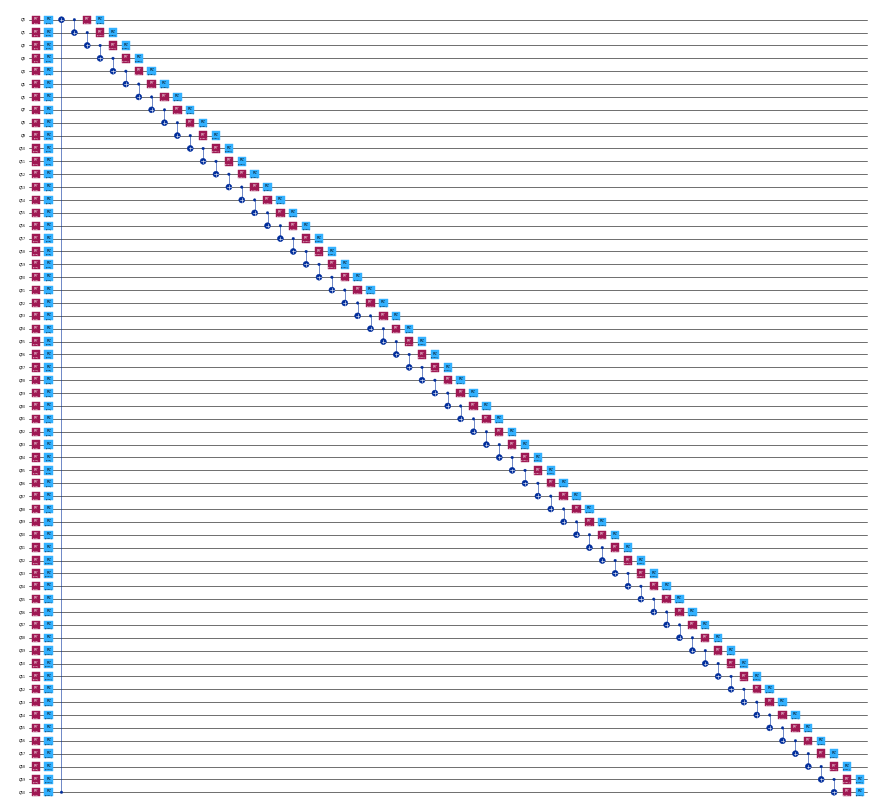

In [6]:
NUM_QUBITS = 61
circuit = EfficientSU2(NUM_QUBITS, entanglement="circular", reps=1).decompose()

print(f"Original circuit -> Depth: {circuit.depth()}, CNOTs: {circuit.num_nonlocal_gates()}")
circuit.draw(fold=-1, output="mpl", style="iqp", scale=0.2)

In [9]:
QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    token="",
    set_as_default=True,
    # Use `overwrite=True` if you're updating your token.
    overwrite=True,
)
 
# Load saved credentials
service = QiskitRuntimeService()

In [10]:
transpiler_ai_false = TranspilerService( 
    backend_name="ibm_brisbane",
    ai="false",
    optimization_level=3,
)

In [11]:
grade_lab3_ait_ex1(transpiler_ai_false) # Expected result type: TranspilerService


Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [12]:
circuit_ai_false = transpiler_ai_false.run(circuit)

INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Transpiled without AI -> Depth: 1319, CNOTs: 328


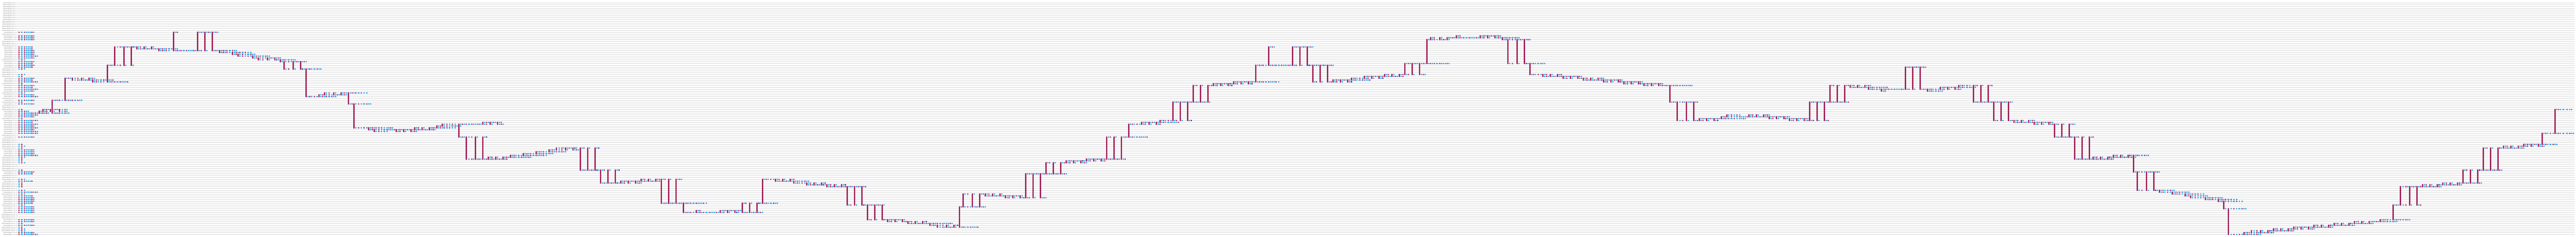

In [13]:
print(f"Transpiled without AI -> Depth: {circuit_ai_false.depth()}, CNOTs: {circuit_ai_false.num_nonlocal_gates()}")
circuit_ai_false.draw(fold=-1, output="mpl", scale=0.2)

In [14]:
transpiler_ai_true = TranspilerService( 
    backend_name="ibm_brisbane",
    ai="true",
    optimization_level=3,
)

In [15]:
grade_lab3_ait_ex2(transpiler_ai_true) # Expected result type: TranspilerService


Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [16]:
circuit_ai_true = transpiler_ai_true.run(circuit)
print(f"Transpiled with AI -> Depth: {circuit_ai_true.depth()}, CNOTs: {circuit_ai_true.num_nonlocal_gates()}")

INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Transpiled with AI -> Depth: 275, CNOTs: 64


INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_tr

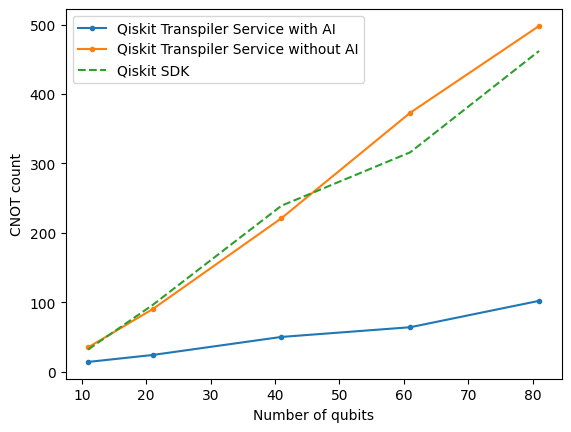

In [17]:
# Transpiling locally using Qiskit SDK
service = QiskitRuntimeService()
backend = service.backend("ibm_sherbrooke")
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
# Run and compile results
num_qubits = [11, 21, 41, 61, 81]
num_cnots_local = []
num_cnots_with_ai = []
num_cnots_without_ai = []

for nq in num_qubits:
    circuit = EfficientSU2(nq, entanglement="circular", reps=1).decompose()

    # Using the Transpiler locally on Qiskit 
    circuit_local = pm.run(circuit)
    # Using the transpiler service without AI
    circuit_without_ai = transpiler_ai_false.run(circuit)
    # Using the transpiler service with AI
    circuit_with_ai = transpiler_ai_true.run(circuit)

    num_cnots_local.append(circuit_local.num_nonlocal_gates())
    num_cnots_without_ai.append(circuit_without_ai.num_nonlocal_gates())
    num_cnots_with_ai.append(circuit_with_ai.num_nonlocal_gates())
plt.plot(num_qubits, num_cnots_with_ai, '.-')
plt.plot(num_qubits, num_cnots_without_ai, '.-')
plt.plot(num_qubits, num_cnots_local, '--')
plt.xlabel("Number of qubits")
plt.ylabel("CNOT count")
plt.legend(["Qiskit Transpiler Service with AI", "Qiskit Transpiler Service without AI", "Qiskit SDK"])